In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, 
    roc_curve, precision_score, recall_score
)


In [2]:
df = pd.read_csv("C:/Users/joshi/Downloads/tumor.csv")

In [3]:
df = df.replace("?", np.nan)
df = df.dropna()

In [4]:
df["Bare Nuclei"] = df["Bare Nuclei"].astype(int)


In [5]:
X = df.drop(columns=["Sample code number", "Class"])
y = df["Class"].apply(lambda x: 1 if x == 4 else 0)  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [9]:
y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

In [10]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Confusion Matrix:
 [[78  1]
 [ 5 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

ROC AUC Score: 0.9978175469227412
Precision: 0.9814814814814815
Recall: 0.9137931034482759


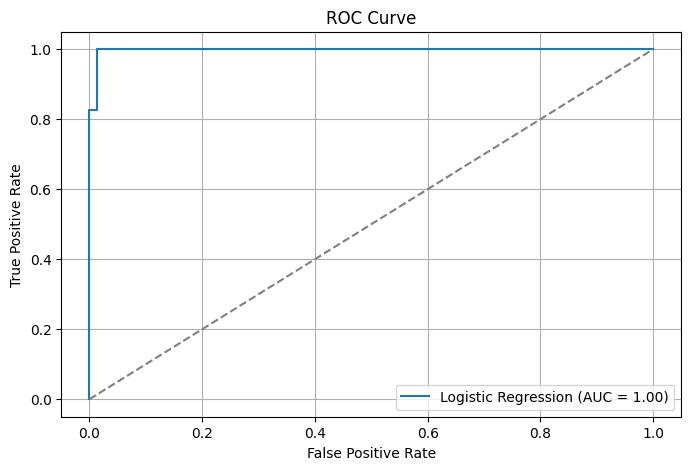

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

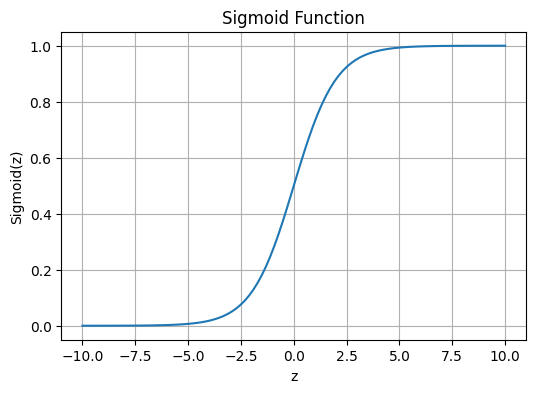

In [12]:
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()